# EDA - ESG & Financial Performance

We have chosen to create this notebook as a good introduction to our project, allowing us to understand and visualize the dataset, and to explain why it is well-suited for our course. It helps set the foundation for the analyses and machine learning models we will develop later on. Conducting an Exploratory Data Analysis (EDA) is a crucial step in this study, as it provides a comprehensive understanding of the dataset before applying any advanced modeling or ranking methods. EDA helps identify key patterns, distributions, and relationships within the ESG metrics, while also revealing potential issues such as missing values, outliers, or inconsistencies. By exploring the data visually and statistically, we ensure that the subsequent analysis is grounded in accurate insights and that the ranking methodology is applied on a clean, well-understood foundation. This step ultimately strengthens the reliability and interpretability of the final results.

## Library Imports

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torch import nn
from sklearn.preprocessing import LabelEncoder
import numpy as np

## Dataframe Visualization

### Exploration : EDA PART

In [ ]:
df = pd.read_csv('company_esg_financial_dataset.csv')

In [ ]:
df.head()

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


In [ ]:
# null values
df[df['Year']!=2015].isnull().sum()

,0
CompanyID,0
CompanyName,0
Industry,0
Region,0
Year,0
Revenue,0
ProfitMargin,0
MarketCap,0
GrowthRate,0
ESG_Overall,0


In [ ]:
df[df['Year']==2015].isnull().sum()
# just for GrowthRate column for 2015 (just logic)

,0
CompanyID,0
CompanyName,0
Industry,0
Region,0
Year,0
Revenue,0
ProfitMargin,0
MarketCap,0
GrowthRate,1000
ESG_Overall,0


In [ ]:
df['GrowthRate'] = df['GrowthRate'].fillna(0)

### Basic Information

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

,CompanyID,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,10000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,1.100000e+04,1.100000e+04
mean,500.500000,2020.000000,4670.850591,10.900455,13380.622236,4.830370,54.615273,56.416991,55.660582,51.767655,1.271462e+06,5.600442e+05,1.165839e+07
std,288.688113,3.162421,9969.954369,8.758711,39922.870373,9.424787,15.893937,26.767233,23.356152,25.323370,5.067760e+06,1.565686e+06,5.095836e+07
min,1.000000,2015.000000,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000,2.042200e+03,1.021100e+03,5.105500e+03
25%,250.750000,2017.000000,938.775000,5.300000,1098.525000,-1.325000,44.100000,34.700000,37.600000,30.775000,1.228530e+05,6.488467e+04,3.069161e+05
50%,500.500000,2020.000000,1902.300000,10.500000,3096.450000,4.900000,54.600000,55.600000,55.150000,52.100000,2.920734e+05,2.038805e+05,1.221745e+06
75%,750.250000,2023.000000,4342.625000,16.300000,9995.500000,11.000000,65.600000,79.000000,73.800000,73.000000,7.407311e+05,5.251880e+05,5.616437e+06
max,1000.000000,2025.000000,180810.400000,50.000000,865271.700000,38.000000,98.800000,100.000000,100.000000,100.000000,1.741047e+08,5.223142e+07,1.741047e+09


In [ ]:
df.groupby('CompanyName').value_counts()
#999 companies

CompanyName  CompanyID  Industry  Region         Year  Revenue  ProfitMargin  MarketCap  GrowthRate  ESG_Overall  ESG_Environmental  ESG_Social  ESG_Governance  CarbonEmissions  WaterUsage  EnergyConsumption
Company_1    1          Retail    Latin America  2016  473.8    4.6           366.6       3.2        56.7         58.9               32.8        78.5            37314.7          18657.4     74629.4              1
                                                 2017  564.9    5.2           313.4       19.2       56.5         57.6               34.0        77.8            45006.4          22503.2     90012.9              1
                                                 2018  558.4    4.3           283.0      -1.1        58.0         62.3               33.4        78.3            42650.1          21325.1     85300.2              1
                                                 2019  554.5    4.9           538.1      -0.7        56.6         63.7               30.0        76.1            41799.4          20899.7     83598.8              1
                                                 2020  567.5    6.0           384.1       2.3        55.7         65.1               28.5        73.5            42245.4          21122.7     84490.9              1
                                                                                                                                                                                                                  ..
Company_999  999        Finance   Asia           2021  5106.7   17.2          14494.9    -3.9        54.1         97.0               24.2        41.0            53176.5          26588.2     132941.1             1
                                                 2022  5340.0   21.2          21433.7     4.6        52.7         96.5               20.6        40.9            55993.6          27996.8     139984.1             1
                                                 2023  5178.3   20.7          12652.4    -3.0        53.6         98.2               19.2        43.4            53102.2          26551.1     132755.5             1
                                                 2024  5464.8   21.5          9851.2      5.5        53.6         98.3               17.7        45.0            55977.4          27988.7     139943.5             1
                                                 2025  5700.3   21.6          19402.0     4.3        53.1         100.0              16.2        43.1            57003.4          28501.7     142508.6             1
Name: count, Length: 10000, dtype: int64

In [ ]:
df['Industry'].unique()

array(['Retail', 'Transportation', 'Technology', 'Finance', 'Healthcare',
       'Energy', 'Consumer Goods', 'Utilities', 'Manufacturing'],
      dtype=object)

In [ ]:
df['Region'].unique()

array(['Latin America', 'Asia', 'Africa', 'Middle East', 'Oceania',
       'Europe', 'North America'], dtype=object)

This helps us understand how diverse our  dataset is across industries and regions which is valuable for clustering (unsupervised learning) or for supervised models with categorical variables.

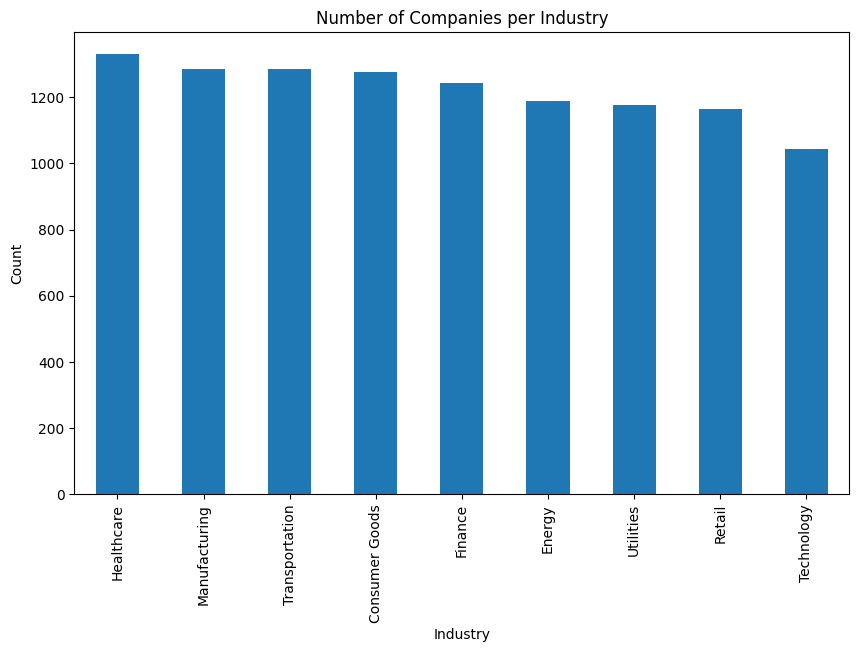

In [ ]:
# Number of companies per industry
plt.figure(figsize=(10,6))
df['Industry'].value_counts().plot(kind='bar')
plt.title("Number of Companies per Industry")
plt.ylabel("Count")
plt.show()

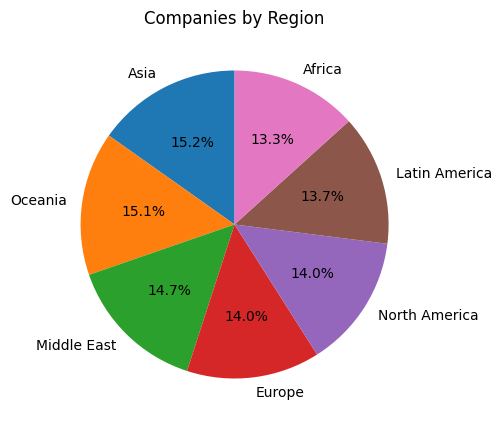

In [ ]:
# Distribution of companies by region
plt.figure(figsize=(8,5))
df['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.title("Companies by Region")
plt.show()

The dataset demonstrates a strong level of diversity across both industries and regions making it highly suitable for robust supervised and unsupervised learning analyses.

### Check ESG score distribution

array([[<Axes: title={'center': 'ESG_Overall'}>,
        <Axes: title={'center': 'ESG_Environmental'}>],
       [<Axes: title={'center': 'ESG_Social'}>,
        <Axes: title={'center': 'ESG_Governance'}>]], dtype=object)

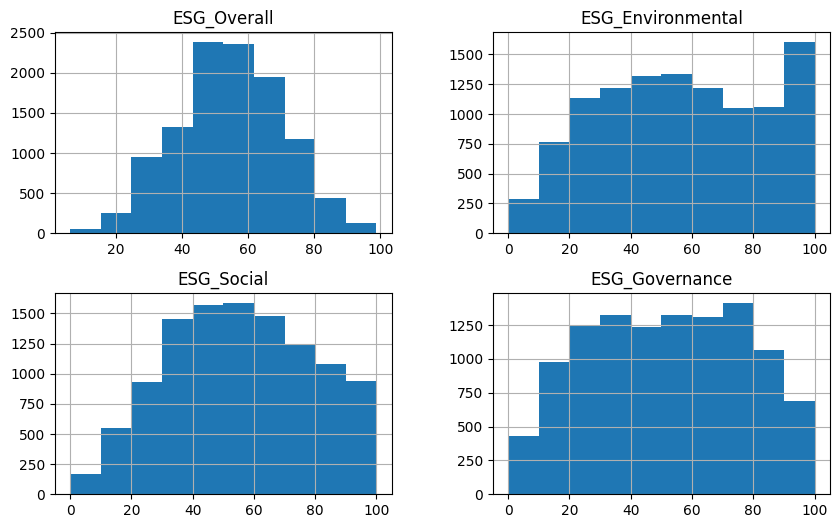

In [ ]:
df[['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']].hist(figsize=(10,6))

The ESG dimensions display diverse statistical behaviors: while ESG_Overall follows a near-normal distribution around moderate values, the Environmental score is more polarized, and the Social and Governance scores are more uniformly distributed.
This diversity indicates that the dataset captures a wide range of ESG behaviors across companies, making it well-suited for both supervised (e.g., ESG prediction) and unsupervised (e.g., clustering firms by sustainability profile) learning tasks.

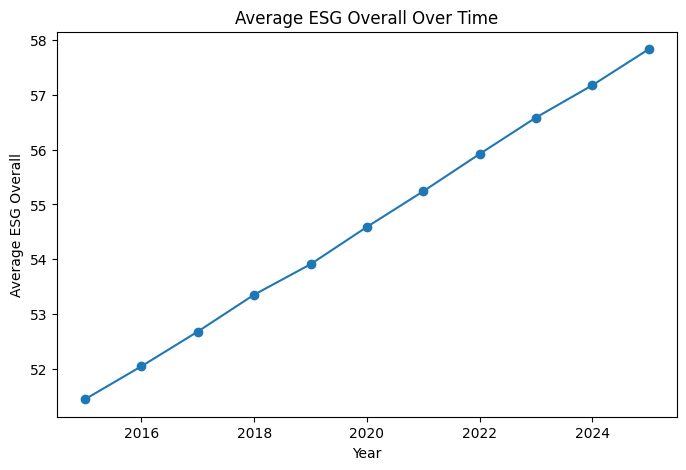

In [ ]:
# Temporal evolution of ESG_Overall
avg_esg_by_year = df.groupby('Year')['ESG_Overall'].mean()
avg_esg_by_year.plot(kind='line', marker='o', figsize=(8,5))
plt.title("Average ESG Overall Over Time")
plt.ylabel("Average ESG Overall")
plt.show()

### Quick insights

In [ ]:
# Companies with high ESG performance (ESG_TARGET = 2)
high_esg = df[
    (df['ESG_Environmental'] >= 75) &
    (df['ESG_Social'] >= 75) &
    (df['ESG_Governance'] >= 75) &
    (df['ESG_Overall'] >= 75)
]

# Companies with moderate ESG performance (ESG_TARGET = 1)
moderate_esg = df[
    (df['ESG_Environmental'] >= 50) &
    (df['ESG_Social'] >= 50) &
    (df['ESG_Governance'] >= 50) &
    (df['ESG_Overall'] >= 50) &
    (
        (df['ESG_Environmental'] < 75) |
        (df['ESG_Social'] < 75) |
        (df['ESG_Governance'] < 75) |
        (df['ESG_Overall'] < 75)
    )
]

# Companies with low ESG performance (ESG_TARGET = 0)
low_esg = df[
    (df['ESG_Environmental'] < 50) |
    (df['ESG_Social'] < 50) |
    (df['ESG_Governance'] < 50)
]

print("High ESG companies:", high_esg.shape[0])
print("Moderate ESG companies:", moderate_esg.shape[0])
print("Low ESG companies:", low_esg.shape[0])


High ESG companies: 318
Moderate ESG companies: 1883
Low ESG companies: 8799


There are 318 high-ESG, 1883 moderate-ESG and 8799 low-ESG entries.
This shows clear variation, which is great for classification or regression tasks.

In [ ]:
# Feature creation : ESG_TARGET
def assign_esg_target(row):
    if (row['ESG_Environmental'] >= 75 and
        row['ESG_Social'] >= 75 and
        row['ESG_Governance'] >= 75 and
        row['ESG_Overall'] >= 75):
        return 2  # High ESG performance
    elif (row['ESG_Environmental'] >= 50 and
          row['ESG_Social'] >= 50 and
          row['ESG_Governance'] >= 50 and
          row['ESG_Overall'] >= 50):
        return 1  # Moderate ESG performance
    else:
        return 0  # Low ESG performance

df['ESG_TARGET'] = df.apply(assign_esg_target, axis=1)

print(df['ESG_TARGET'].value_counts())


ESG_TARGET
0    8799
1    1883
2     318
Name: count, dtype: int64


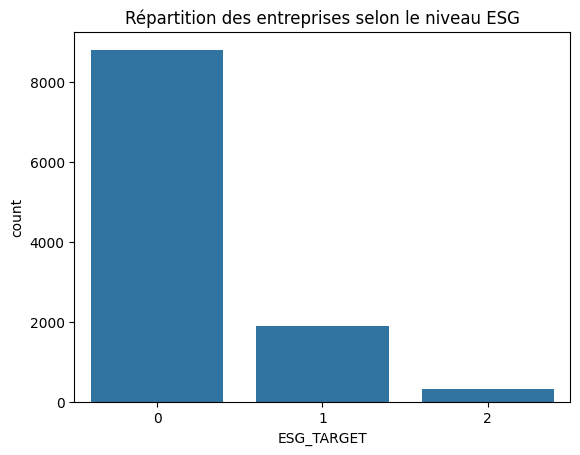

In [ ]:
sns.countplot(data=df, x='ESG_TARGET')
plt.title("Répartition des entreprises selon le niveau ESG")
plt.show()


### Correlation check

In [ ]:
df.corr(numeric_only=True)['ESG_Overall'].sort_values(ascending=False)

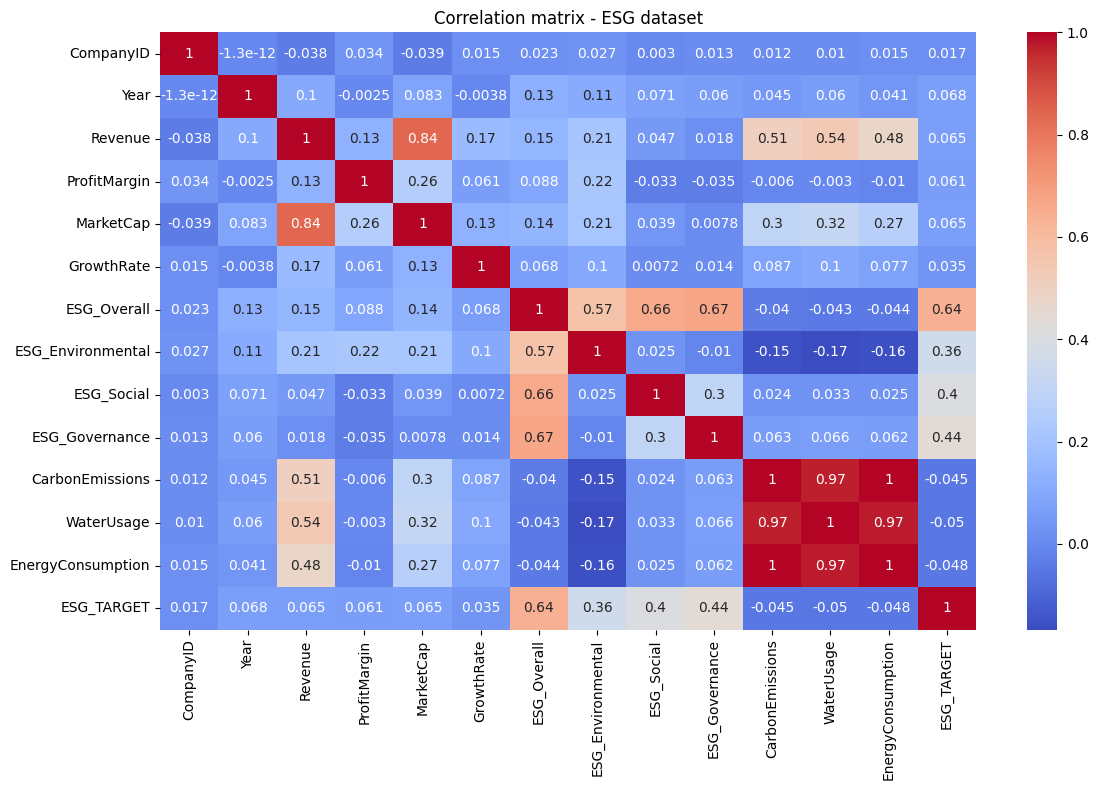

In [ ]:
# correlation plot
num_df = df.select_dtypes(include=["float64", "int64"])

corr_matrix = num_df.corr(method='pearson')
#print(corr_matrix.round(2))

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,
            annot=True,
            cmap="coolwarm",
            cbar=True)
plt.title("Correlation matrix - ESG dataset")
plt.tight_layout()
plt.show()

The correlation matrix reveals consistent internal logic in the dataset.
Financial variables are strongly correlated among themselves, particularly Revenue and MarketCap. ESG dimensions are also internally consistent, with the Overall ESG score showing strong correlations with its three subcomponents.
Environmental indicators (emissions, water, energy) are almost perfectly correlated, suggesting they represent overlapping concepts.
Interestingly, the relationships between financial and ESG metrics remain weak to moderate, indicating that while company size may slightly influence ESG performance, profitability does not directly drive sustainability scores.
This balanced correlation structure confirms that the dataset is rich and varied enough for both supervised learning (predicting ESG scores from financial indicators) and unsupervised learning (identifying company clusters by ESG-financial profiles).